In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft
from scipy.fftpack import fft, ifft

In [2]:
def dft(x):
    x = np.asarray(x, dtype=float)  # Converts input in array
    N = x.shape[0]                  # Number of rows
    n = np.arange(N)                # Return evenly spaced values within a given interval
    k = n.reshape((N, 1))           # Gives a new shape to an array without changing its data
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [3]:
plt.style.use('seaborn-poster')
%matplotlib inline

def FFT(x):
    
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X# sampling rate

In [4]:
def FFT_V(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    if np.log2(N) % 1 > 0:
        raise ValueError("must be a power of 2")
        
    N_min = min(N, 2)
    
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))
    
    while X.shape[0] < N:
        X_even = X[:, :int(X.shape[1] / 2)]
        X_odd = X[:, int(X.shape[1] / 2):]
        terms = np.exp(-1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + terms * X_odd,
                       X_even - terms * X_odd])
        
    return X.ravel()

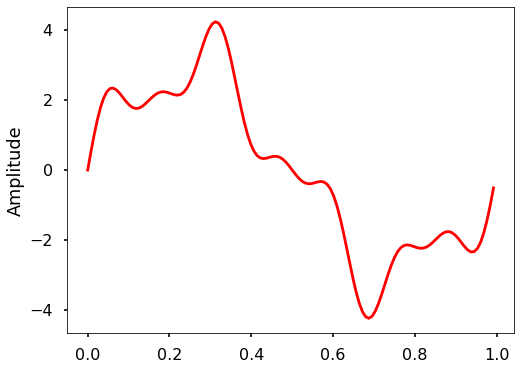

In [5]:
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

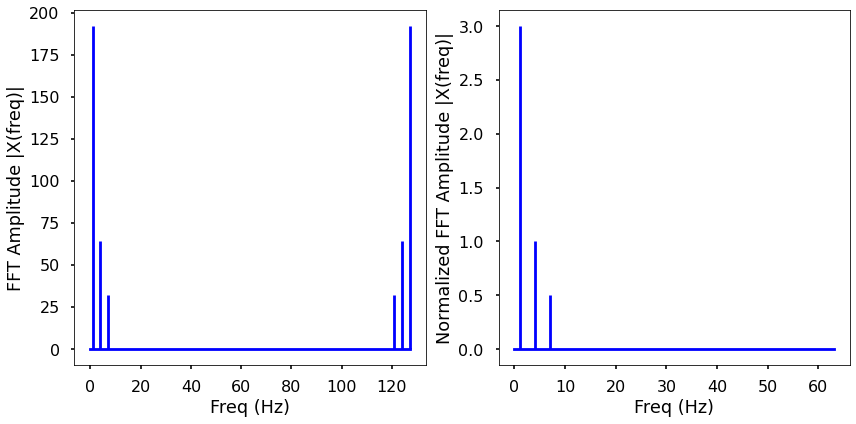

In [6]:
X=dft(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

In [7]:
%timeit dft(x)

2.03 ms ± 303 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


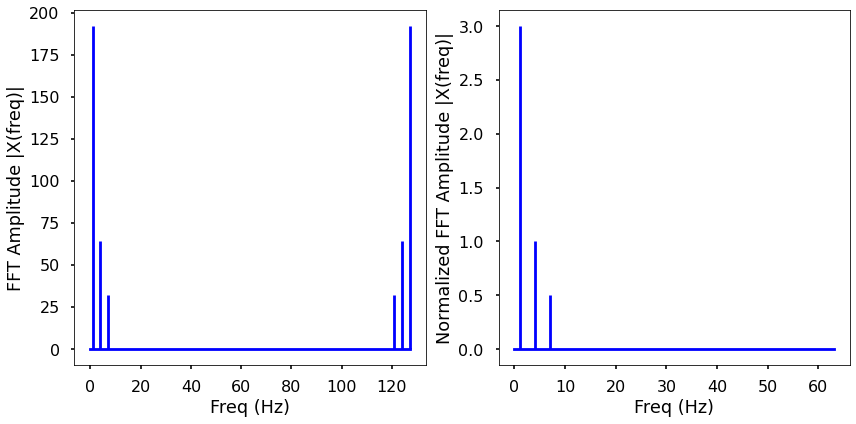

In [8]:
X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

In [9]:
%timeit FFT(x)

1.04 ms ± 8.27 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


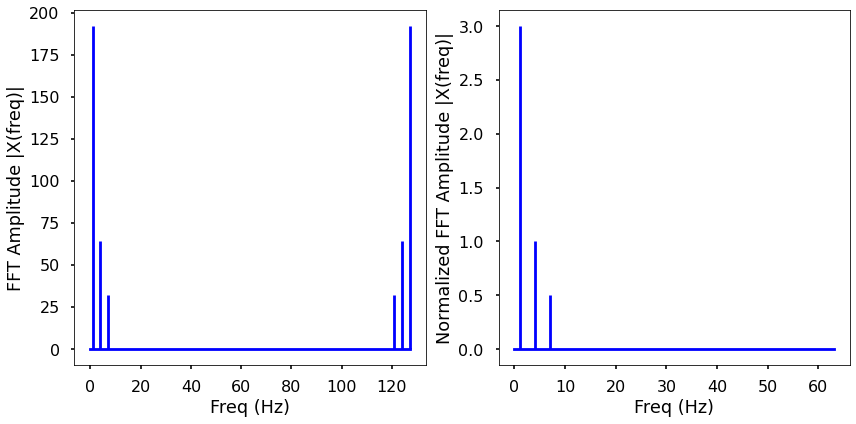

In [10]:
X=FFT_V(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

In [11]:
x = np.random.random(1024)

In [12]:
X1 = dft(x)
X2 = fft(x)
print(np.array_equal(X1,X2))

False


In [13]:
np.allclose(X1,X2,rtol=1e-05,atol=1e-08,equal_nan=False)

True

In [14]:
i = 0
while i<10:
    x = np.random.random(1024)
    X1 = dft(x)
    X2 = fft(x)
    X3 = FFT(x)
    X4 = FFT_V(x)
    print("Case", i+1, ":")
    print("\t", np.allclose(X1,X2,rtol=1e-05,atol=1e-08,equal_nan=False))
    print("\t", np.allclose(X2,X3,rtol=1e-05,atol=1e-08,equal_nan=False))
    print("\t", np.allclose(X2,X4,rtol=1e-05,atol=1e-08,equal_nan=False))
    i+=1

Case 1 :
	 True
	 True
	 True
Case 2 :
	 True
	 True
	 True
Case 3 :
	 True
	 True
	 True
Case 4 :
	 True
	 True
	 True
Case 5 :
	 True
	 True
	 True
Case 6 :
	 True
	 True
	 True
Case 7 :
	 True
	 True
	 True
Case 8 :
	 True
	 True
	 True
Case 9 :
	 True
	 True
	 True
Case 10 :
	 True
	 True
	 True


In [15]:
%timeit dft(x)

120 ms ± 2.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [16]:
%timeit fft(x)

10.9 µs ± 95.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [17]:
%timeit FFT(x)

8.76 ms ± 146 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
%timeit FFT_V(x)

248 µs ± 16.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [19]:
x1 = np.random.random(2048)         # 2^11   
x2 = np.random.random(1024)         # 2^10
x3 = np.random.random(8192)         # 2^13

In [20]:
def unittest(x):
    X1 = dft(x)
    X2 = fft(x)
    X3 = FFT(x)
    X4 = FFT_V(x)
    print("Input: \n", x)
    print("DFT: \t", np.allclose(X1,X2,rtol=1e-05,atol=1e-08,equal_nan=False))
    print("FFT: \t", np.allclose(X2,X3,rtol=1e-05,atol=1e-08,equal_nan=False))
    print("FFT_V \t", np.allclose(X2,X4,rtol=1e-05,atol=1e-08,equal_nan=False))
    print("\n Output: \n")
    print("DFT: \n", X1)
    print("FFT: \n", X3)
    print("FFT_v \n", X4)

In [21]:
unittest(x1)

Input: 
 [0.34453145 0.08562878 0.77366504 ... 0.59627621 0.24635523 0.82300576]
DFT: 	 True
FFT: 	 True
FFT_V 	 True

 Output: 

DFT: 
 [1024.09138451 +0.j           -2.19604522 +5.71076126j
    5.23600302 -8.93060993j ...   -1.65305407+23.18246787j
    5.23600302 +8.93060993j   -2.19604522 -5.71076126j]
FFT: 
 [1024.09138451 +0.j           -2.19604522 +5.71076126j
    5.23600302 -8.93060993j ...   -1.65305407+23.18246787j
    5.23600302 +8.93060993j   -2.19604522 -5.71076126j]
FFT_v 
 [1024.09138451 +0.j           -2.19604522 +5.71076126j
    5.23600302 -8.93060993j ...   -1.65305407+23.18246787j
    5.23600302 +8.93060993j   -2.19604522 -5.71076126j]


In [22]:
unittest(x2)

Input: 
 [0.49082791 0.22305032 0.94316283 ... 0.76636492 0.74346717 0.32483704]
DFT: 	 True
FFT: 	 True
FFT_V 	 True

 Output: 

DFT: 
 [ 5.15342840e+02+0.j          1.01437895e+01+7.11076543j
 -6.89489354e+00+4.26042061j ... -3.89678904e-01+4.45250865j
 -6.89489354e+00-4.26042061j  1.01437895e+01-7.11076543j]
FFT: 
 [ 5.15342840e+02+0.j          1.01437895e+01+7.11076543j
 -6.89489354e+00+4.26042061j ... -3.89678904e-01+4.45250865j
 -6.89489354e+00-4.26042061j  1.01437895e+01-7.11076543j]
FFT_v 
 [ 5.15342840e+02+0.j          1.01437895e+01+7.11076543j
 -6.89489354e+00+4.26042061j ... -3.89678904e-01+4.45250865j
 -6.89489354e+00-4.26042061j  1.01437895e+01-7.11076543j]


In [23]:
unittest(x3)

Input: 
 [0.0457475  0.49813832 0.75820591 ... 0.74663368 0.15051102 0.66236844]
DFT: 	 True
FFT: 	 True
FFT_V 	 True

 Output: 

DFT: 
 [ 4.08382242e+03 +0.j          1.95332812e-01-25.92288452j
 -1.09583064e+01-10.74512293j ...  3.24708770e+01+21.29695189j
 -1.09583064e+01+10.74512293j  1.95332812e-01+25.92288452j]
FFT: 
 [ 4.08382242e+03 +0.j          1.95332812e-01-25.92288452j
 -1.09583064e+01-10.74512293j ...  3.24708770e+01+21.29695189j
 -1.09583064e+01+10.74512293j  1.95332812e-01+25.92288452j]
FFT_v 
 [ 4.08382242e+03 +0.j          1.95332812e-01-25.92288452j
 -1.09583064e+01-10.74512293j ...  3.24708770e+01+21.29695189j
 -1.09583064e+01+10.74512293j  1.95332812e-01+25.92288452j]


In [24]:
x1 = np.random.random(1048576)         # 2^20   
x2 = np.random.random(33554432)        # 2^25

In [25]:
def unittest2(x):
    X2 = fft(x)
    X4 = FFT_V(x)
    print("Input: \n", x)
    print("FFT_V \t", np.allclose(X2,X4,rtol=1e-05,atol=1e-08,equal_nan=False))
    print("\n Output: \n")
    print("FFT_v \n", X4)

In [26]:
unittest2(x1)

Input: 
 [0.51205439 0.2953748  0.37800691 ... 0.789461   0.44317109 0.8809685 ]
FFT_V 	 True

 Output: 

FFT_v 
 [ 5.24249562e+05  +0.j          4.65879287e+02  -8.27216425j
 -1.16374006e+02-215.08485704j ... -1.67631032e+02 -22.14966693j
 -1.16374006e+02+215.08485704j  4.65879287e+02  +8.27216425j]


In [27]:
unittest2(x2)

Input: 
 [0.22095204 0.75681266 0.87264827 ... 0.85627376 0.70501257 0.12517315]
FFT_V 	 True

 Output: 

FFT_v 
 [ 1.67786753e+07   +0.j          5.66781578e+01 +553.50750192j
 -6.36185126e+02+1276.38508402j ...  2.16177827e+02-1043.91410669j
 -6.36185126e+02-1276.38508402j  5.66781578e+01 -553.50750192j]


In [34]:
from timeit import default_timer as timer

N = 1024       # 2^10
i = 0
while i != 15:
    x = np.random.random(N)
    j = 0
    times = []
    
    while j != 10:
        start = timer()
        X = FFT_V(x)
        end = timer()
        time = end-start
        times.append(time)
        j+=1
        
    average = np.mean(times)
    desviation = np.std(times)
        
    print("Size of N:", N)
    print("Average Time:", average)
    print("Standard Desviation", desviation)
    print("\n")
    i+=1
    N*=2

Size of N: 1024
Average Time: 0.00037031449996902663
Standard Desviation 0.0003360625745251622


Size of N: 2048
Average Time: 0.00039330439999503143
Standard Desviation 5.4958496200261704e-05


Size of N: 4096
Average Time: 0.0005838845999733167
Standard Desviation 2.827976229866263e-05


Size of N: 8192
Average Time: 0.000996049400055199
Standard Desviation 1.9379925557523726e-05


Size of N: 16384
Average Time: 0.0017965203000585462
Standard Desviation 6.381512801420919e-05


Size of N: 32768
Average Time: 0.009251793700013878
Standard Desviation 0.00010934509003745456


Size of N: 65536
Average Time: 0.01931392230003439
Standard Desviation 0.0006604803157864763


Size of N: 131072
Average Time: 0.04263230810006462
Standard Desviation 0.0019725422730663194


Size of N: 262144
Average Time: 0.09390219590000015
Standard Desviation 0.005217572236558978


Size of N: 524288
Average Time: 0.16233227770007944
Standard Desviation 0.005390355898752742


Size of N: 1048576
Average Time: 0.286